In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
df = pd.read_csv('./3Jan_chiller1.csv',index_col=0)
df.index.name='ts'
df.head()

,ch1Watt,ch2Watt,ch3Watt,totalPositiveWattHour,PositiveWattHour,temp1,temp2,temp3,temp4,e.flowRate,e.flowSpeed,e.totalFlowRate,c.flowRate,c.flowSpeed,c.totalFlowRate,Coolingcap
ts,,,,,,,,,,,,,,,,
2017-05-01 00:00:00,54214.357143,50918.589286,52073.500000,0.0,156600.0,12.421112,16.275228,29.816259,26.318716,207.265389,3.087748,0.0,221.046209,1.902006,0.0,55.767220
2017-05-01 01:00:00,30305.392857,26247.803571,28257.714286,156600.0,83800.0,8.701223,11.235682,28.610714,26.630606,225.610802,3.361050,210.0,229.764071,1.977019,223.0,39.918360
2017-05-01 02:00:00,17133.333333,13040.438596,14700.964912,240400.0,45100.0,9.398168,11.133499,24.589259,23.434271,225.662504,3.361820,436.0,227.765573,1.959823,453.0,27.338155
2017-05-01 03:00:00,16940.946429,12807.750000,14721.910714,285500.0,43300.0,9.646420,11.378396,24.020174,22.869687,225.772536,3.363459,662.0,226.770818,1.951264,681.0,27.298609
2017-05-01 04:00:00,17188.875000,12808.803571,14656.392857,328800.0,44100.0,9.635645,11.379343,24.020132,22.866923,225.691767,3.362256,887.0,226.592686,1.949731,907.0,27.473529


Note:

temp1 is chilled water supply, temp2 is chilled water return

Chilled water after passing through site, returns at higher temp, so 

temp2 > temp1 (return>supply). This occurs at evaporator.

Note:

temp3 is cooling water supply, temp4 is cooling water return

Cooling water after cooled down by atmospheric air, returns at lower 

temp, so temp4 < temp3 (return<supply). This occurs at condenser.

In [77]:
df['t2-t1'] = df['temp2']-df['temp1']
df['t3-t4'] = df['temp3']-df['temp4']

In [78]:
df.head()

,ch1Watt,ch2Watt,ch3Watt,totalPositiveWattHour,PositiveWattHour,temp1,temp2,temp3,temp4,e.flowRate,e.flowSpeed,e.totalFlowRate,c.flowRate,c.flowSpeed,c.totalFlowRate,Coolingcap,t2-t1,t3-t4
ts,,,,,,,,,,,,,,,,,,
2017-05-01 00:00:00,54214.357143,50918.589286,52073.500000,0.0,156600.0,12.421112,16.275228,29.816259,26.318716,207.265389,3.087748,0.0,221.046209,1.902006,0.0,55.767220,3.854116,3.497543
2017-05-01 01:00:00,30305.392857,26247.803571,28257.714286,156600.0,83800.0,8.701223,11.235682,28.610714,26.630606,225.610802,3.361050,210.0,229.764071,1.977019,223.0,39.918360,2.534460,1.980108
2017-05-01 02:00:00,17133.333333,13040.438596,14700.964912,240400.0,45100.0,9.398168,11.133499,24.589259,23.434271,225.662504,3.361820,436.0,227.765573,1.959823,453.0,27.338155,1.735331,1.154988
2017-05-01 03:00:00,16940.946429,12807.750000,14721.910714,285500.0,43300.0,9.646420,11.378396,24.020174,22.869687,225.772536,3.363459,662.0,226.770818,1.951264,681.0,27.298609,1.731976,1.150487
2017-05-01 04:00:00,17188.875000,12808.803571,14656.392857,328800.0,44100.0,9.635645,11.379343,24.020132,22.866923,225.691767,3.362256,887.0,226.592686,1.949731,907.0,27.473529,1.743698,1.153209


In [79]:
df.describe()

,ch1Watt,ch2Watt,ch3Watt,totalPositiveWattHour,PositiveWattHour,temp1,temp2,temp3,temp4,e.flowRate,e.flowSpeed,e.totalFlowRate,c.flowRate,c.flowSpeed,c.totalFlowRate,Coolingcap,t2-t1,t3-t4
count,5136.000000,5136.000000,5136.000000,5.136000e+03,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000
mean,8256.895749,7303.902162,7926.704281,7.556959e+07,23557.281931,13.459328,17.447014,28.784615,28.657843,38.123728,0.567950,119905.258470,36.727766,0.316026,121303.175623,6.303805,3.987686,0.126771
std,18869.870806,17581.557387,18157.784970,4.007768e+07,54491.009897,3.395059,6.314457,3.491130,3.156010,78.066432,1.162999,62979.713874,81.070856,0.697579,62799.712185,15.522770,3.558704,1.593960
min,321.766667,0.000000,335.540984,0.000000e+00,100.000000,5.533371,6.296005,19.380773,19.499690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.895263,-2.988231,-3.939465
25%,341.516667,0.000000,351.210714,2.941442e+07,700.000000,10.915025,11.856079,26.745768,26.544355,0.000000,0.000000,47881.000000,0.000000,0.000000,48734.000000,0.000000,1.139851,-0.629031
50%,345.516667,0.000000,356.773164,8.668967e+07,700.000000,12.847201,15.235329,29.068668,29.100800,0.000000,0.000000,140299.125000,0.000000,0.000000,144428.000000,0.000000,3.196135,-0.131882
75%,350.900000,0.000000,366.936607,1.141867e+08,700.000000,16.479238,23.241253,31.010190,31.002161,14.610894,0.217667,178861.000000,0.000000,0.000000,181108.000000,0.000000,6.521689,0.094662
max,75575.066667,71037.800000,72906.050000,1.189562e+08,226300.000000,24.037044,35.801574,38.811761,37.741675,230.199586,3.429412,194046.000000,235.573485,2.027007,186870.000000,68.192376,14.585299,15.983803


## Flow rate vs flow speed

Make sense. Volumetric flow rate = cross sectional area * flow speed

conceptually we can view flow rate and flow speed as one variable

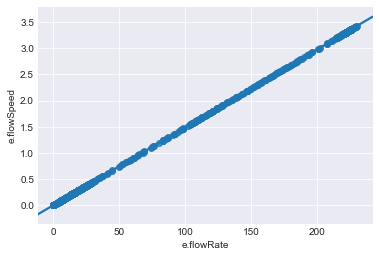

In [80]:
sns.set_style('darkgrid')
sns.regplot('e.flowRate','e.flowSpeed',data=df)
#df.plot.scatter('e.flowRate','e.flowSpeed')

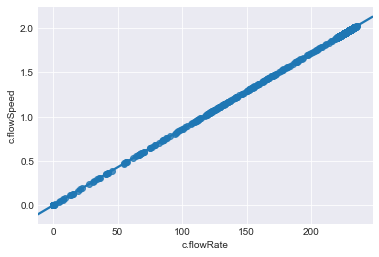

In [81]:
sns.regplot('c.flowRate','c.flowSpeed',data=df)
#df.plot.scatter('c.flowRate','c.flowSpeed')

## Evaporator vs condenser

Accumulated flow rate over time

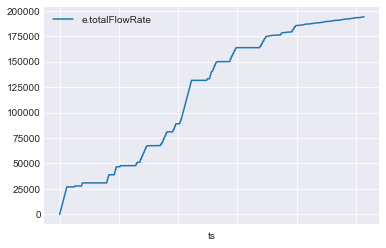

In [82]:
df.reset_index().plot(x='ts',y='e.totalFlowRate')

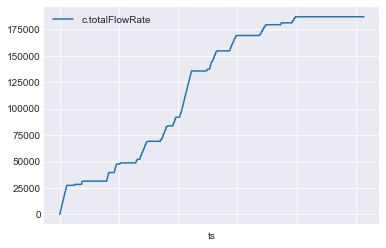

In [83]:
df.reset_index().plot(x='ts',y='c.totalFlowRate')

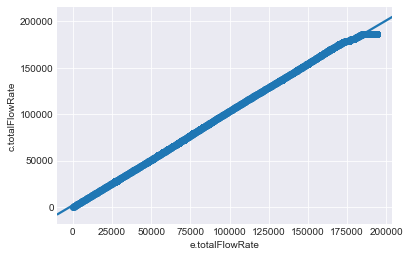

In [84]:
sns.regplot('e.totalFlowRate','c.totalFlowRate',data=df)

Interesting, it seems condenser and evaporator total flow rate are correlated.

## Temp

As expected, temp1 and temp2 are correlated, temp3 and temp4 are correlated.

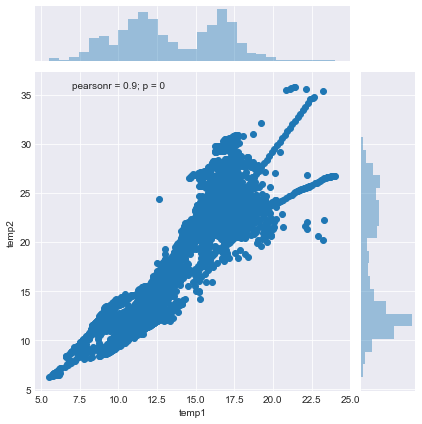

In [85]:
sns.jointplot('temp1','temp2',data=df)

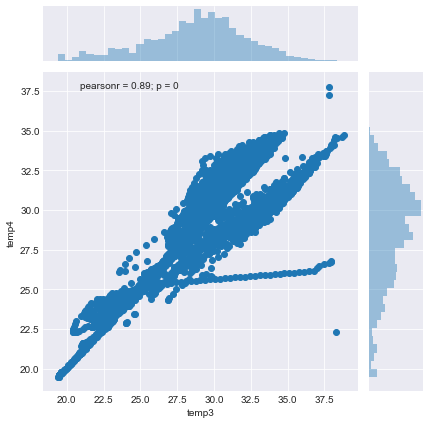

In [86]:
sns.jointplot('temp3','temp4',data=df)

As expected, temp1 and 3 are not correlated.

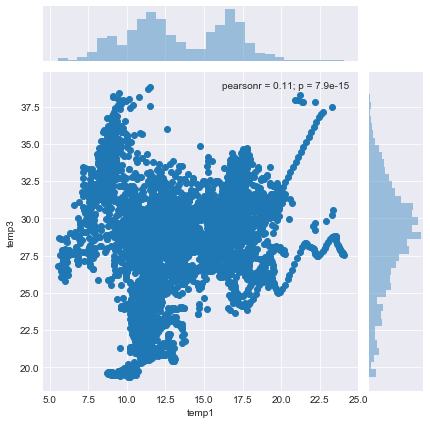

In [87]:
sns.jointplot('temp1','temp3',data=df)

## Power

Accumulated power over time

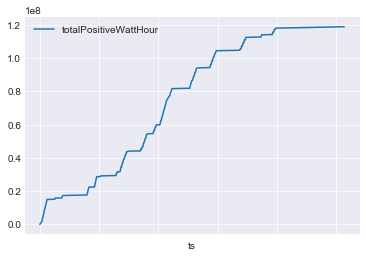

In [88]:
df.reset_index().plot(x='ts',y='totalPositiveWattHour')

Relationship between flow rate and power, both condenser and evaporator seems to affect power. Someone tells me what that big lump on the right is

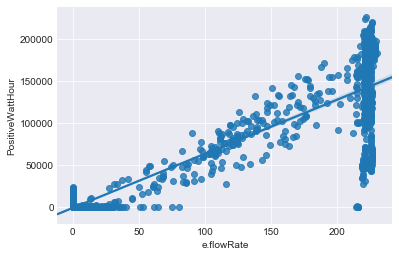

In [89]:
sns.regplot('e.flowRate','PositiveWattHour',data=df)

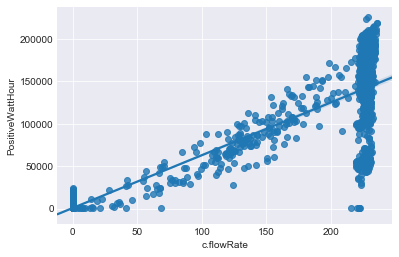

In [90]:
sns.regplot('c.flowRate','PositiveWattHour',data=df)

temp difference and power also has some relationship. Someone tells me what that big lump on the left is.

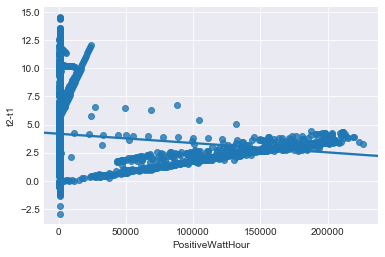

In [91]:
sns.regplot('PositiveWattHour','t2-t1',data=df)

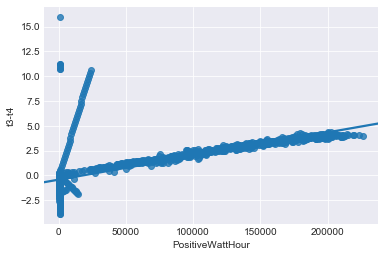

In [92]:
sns.regplot('PositiveWattHour','t3-t4',data=df)

Power and cooling capacity seems to have a good relationship.

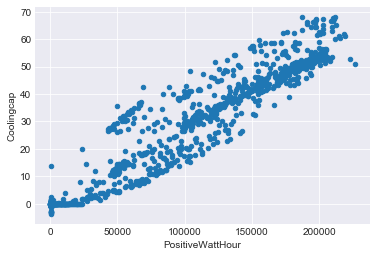

In [93]:
df.plot.scatter('PositiveWattHour','Coolingcap')